# Cooperative Coevolution of Predator Robots based on BSO

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from optim.BSO.bso import bso
from prey.prey import smartLinear
from visual.visual import Plot

## Define Testing Grid and Robots

In [5]:
grid = 30
Ns = 8
Np = 10
p_robots = np.random.randint(0, grid, (Ns, Np, 2))
prey = np.random.randint(0, grid, 2)

## BSO Iteration

BSO caputured with 19 steps


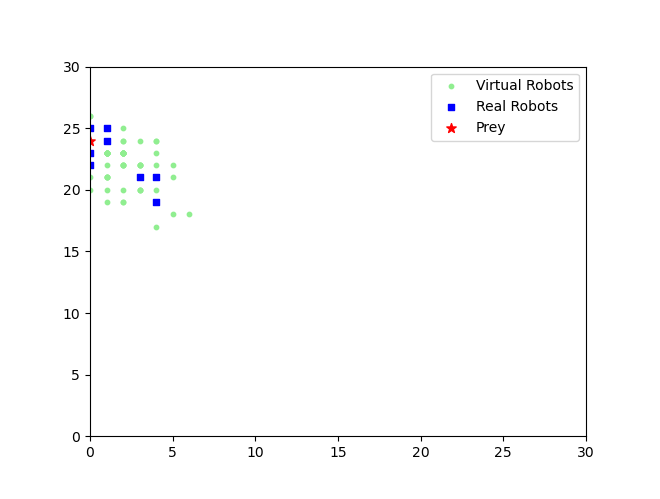

In [6]:
T = 100
plotter = Plot(grid)
for t in range(T):
    prey = smartLinear(p_robots[:, 0], prey, grid)
    if prey is None:
        break
    bso(p_robots, prey, grid)
    plotter.update(p_robots, prey)
if prey is None:
    print(f'BSO caputured with {plotter.cnt} steps')
else:
    print(f'Failed to capture within {plotter.cnt} steps')
plotter.save(file='example.gif')